In [14]:
%pip install python-louvain
%pip install pandas
%pip install kagglehub
%pip install networkx
%pip install matplotlib


import os
import pandas as pd
import kagglehub
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain


Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## CARICAMENTO DATASET

In [15]:
# Simulazione del download del dataset Disney da un percorso locale
path = kagglehub.dataset_download("shivamb/disney-movies-and-tv-shows")
file_path = os.path.join(path, "disney_plus_titles.csv")

# Leggere il file CSV
df = pd.read_csv(file_path)

# Mostrare le prime righe del dataset per capire la struttura
print(df.head())


  show_id     type                                             title  \
0      s1    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1      s2    Movie                            Ernest Saves Christmas   
2      s3    Movie                      Ice Age: A Mammoth Christmas   
3      s4    Movie                        The Queen Family Singalong   
4      s5  TV Show                             The Beatles: Get Back   

                            director  \
0  Alonso Ramirez Ramos, Dave Wasson   
1                        John Cherry   
2                       Karen Disher   
3                    Hamish Hamilton   
4                                NaN   

                                                cast        country  \
0  Chris Diamantopoulos, Tony Anselmo, Tress MacN...            NaN   
1           Jim Varney, Noelle Parker, Douglas Seale            NaN   
2  Raymond Albert Romano, John Leguizamo, Denis L...  United States   
3  Darren Criss, Adam Lambert, Derek Hough

## Creazione Grafo

In [16]:
# Crea un grafo vuoto
G = nx.Graph()

# Aggiungiamo nodi e archi
for index, row in df.iterrows():
    movie = row['title']  # Usa la colonna 'title' per i titoli
    
    # Verifica se la colonna 'cast' non è NaN prima di splittare
    if pd.notna(row['cast']):
        actors = row['cast'].split(',')  # Usa la colonna 'cast' per gli attori, separati da virgola
        
        # Aggiungi il film/serie TV come nodo
        G.add_node(movie)
        
        # Aggiungi ciascun attore come nodo e un arco tra il film/serie e l'attore
        for actor in actors:
            G.add_node(actor.strip())  # Aggiungi l'attore come nodo
            G.add_edge(movie, actor.strip())  # Aggiungi un arco tra il film/serie e l'attore

# Stampa il numero di nodi e archi
print(f"Numero di nodi: {G.number_of_nodes()}")
print(f"Numero di archi: {G.number_of_edges()}")

Numero di nodi: 5014
Numero di archi: 5899


## Visualizzazione campione della rete

Numero di nodi (componente connessa più grande): 3755
Numero di archi (componente connessa più grande): 4912


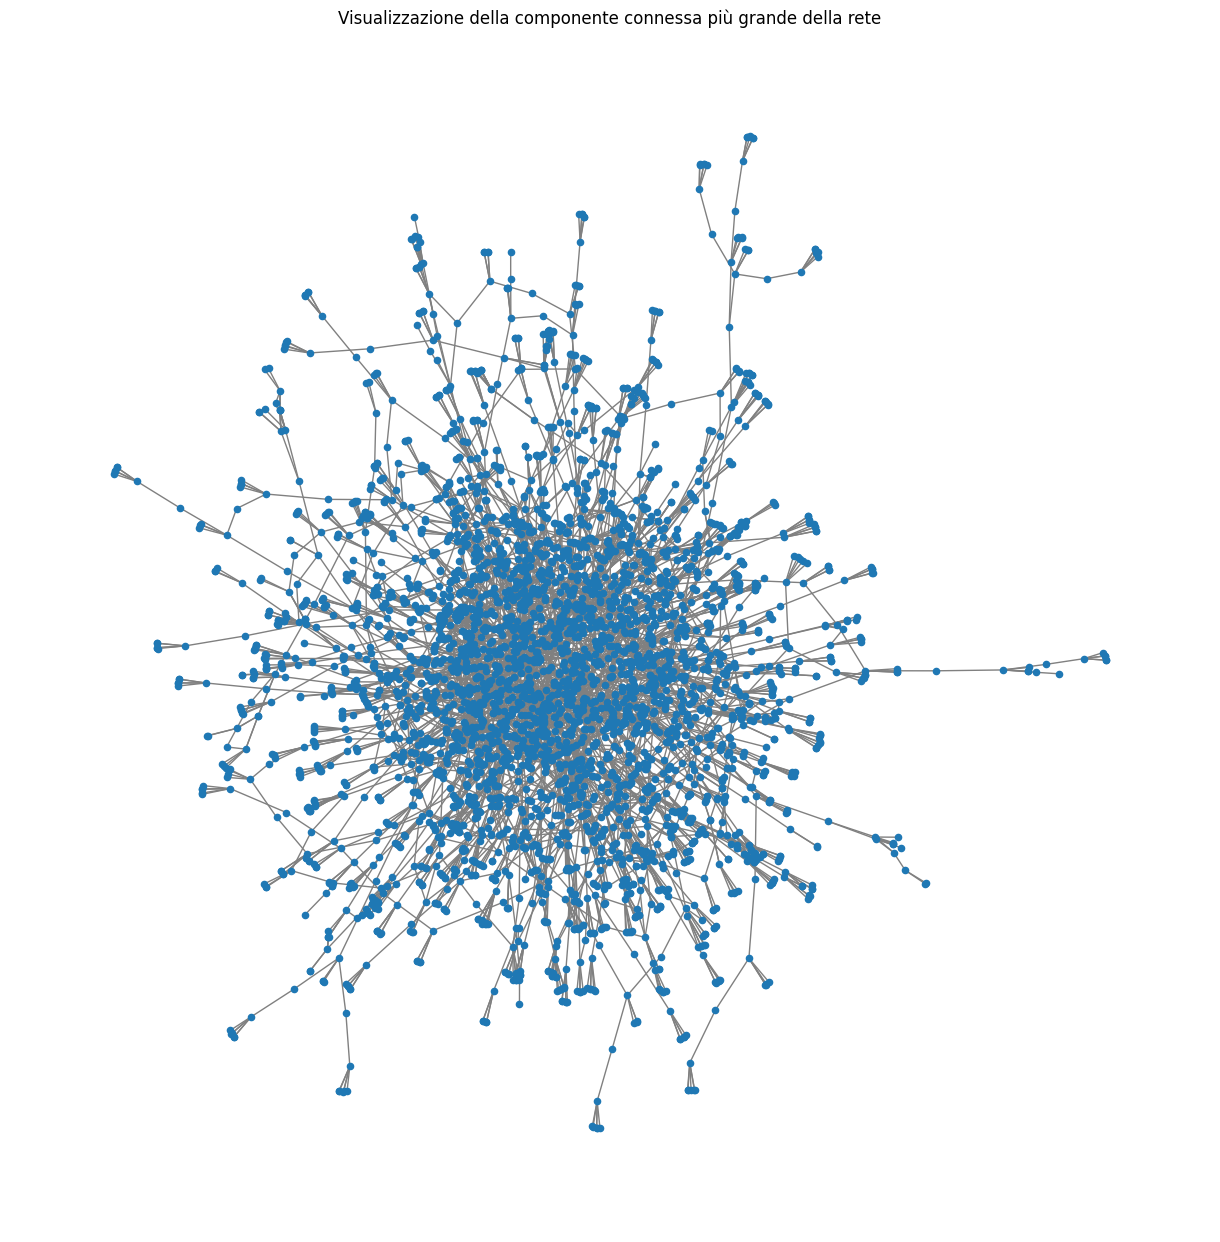

In [38]:
# Crea un grafo vuoto
G = nx.Graph()

# Aggiungiamo nodi e archi
for index, row in df.iterrows():
    movie = row['title']  # Usa la colonna 'title' per i titoli
    
    # Verifica se la colonna 'cast' non è NaN prima di splittare
    if pd.notna(row['cast']):
        actors = row['cast'].split(',')  # Usa la colonna 'cast' per gli attori, separati da virgola
        
        # Aggiungi il film/serie TV come nodo
        G.add_node(movie)
        
        # Aggiungi ciascun attore come nodo e un arco tra il film/serie e l'attore
        for actor in actors:
            G.add_node(actor.strip())  # Aggiungi l'attore come nodo
            G.add_edge(movie, actor.strip())  # Aggiungi un arco tra il film/serie e l'attore

# Trova la componente connessa più grande
largest_cc = max(nx.connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()

# Stampa il numero di nodi e archi della componente connessa più grande
print(f"Numero di nodi (componente connessa più grande): {G.number_of_nodes()}")
print(f"Numero di archi (componente connessa più grande): {G.number_of_edges()}")

# Visualizzazione della componente connessa più grande del grafo
plt.figure(figsize=(12, 12))
nx.draw(G, node_size=20, edge_color='gray', with_labels=False)
plt.title("Visualizzazione della componente connessa più grande della rete")
plt.show()


## Densità della rete

In [39]:
# Densità della rete
density = nx.density(G)
print(f"Densità della rete: {density:.4f}")


Densità della rete: 0.0007


## Analisi della centralità

In [40]:
# Centralità per grado
degree_centrality = nx.degree_centrality(G)

# Centralità di betweenness
betweenness_centrality = nx.betweenness_centrality(G)

# Centralità di closeness
closeness_centrality = nx.closeness_centrality(G)

# Centralità di eigenvector
eigenvector_centrality = nx.eigenvector_centrality(G)

# Visualizza i 10 nodi più centrali per ogni tipo di centralità
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 nodi per grado di centralità:", top_degree)
print("Top 10 nodi per centralità di betweenness:", top_betweenness)
print("Top 10 nodi per centralità di closeness:", top_closeness)
print("Top 10 nodi per centralità di eigenvector:", top_eigenvector)


Top 10 nodi per grado di centralità: [('Jim Cummings', 0.008790623335109216), ('Walt Disney', 0.005327650506126798), ('Larry the Cable Guy', 0.005061267980820458), ('Bill Farmer', 0.004794885455514118), ('Tress MacNeille', 0.004262120404901438), ('Corey Burton', 0.004262120404901438), ('Keith Ferguson', 0.004262120404901438), ('Bob Peterson', 0.003995737879595098), ('Jeff Bennett', 0.003995737879595098), ('Pinto Colvig', 0.003995737879595098)]
Top 10 nodi per centralità di betweenness: [('Jim Cummings', 0.1528739978607631), ('Jeff Bennett', 0.07642691659745694), ('Corey Burton', 0.06234621524483089), ('Gnomeo & Juliet', 0.06233842190549574), ('Wallace Shawn', 0.05922733502459723), ('Russi Taylor', 0.051793548698262706), ('Brenda Song', 0.04888974000321363), ('Get a Horse!', 0.048738488420596394), ('Stephen Tobolowsky', 0.047289991071807425), ('Raven-Symoné', 0.047244657903336144)]
Top 10 nodi per centralità di closeness: [('Jim Cummings', 0.14176201805067784), ('Jeff Bennett', 0.134846

## Analisi della struttura del grafo

In [41]:
# Assumiamo che G sia il tuo grafo

# Verifica se il grafo è connesso
if nx.is_connected(G):
    # Se il grafo è connesso, calcola il diametro e la distanza media
    diameter = nx.diameter(G)
    print(f"Diametro della rete: {diameter}")

    avg_shortest_path_length = nx.average_shortest_path_length(G)
    print(f"Distanza media tra i nodi: {avg_shortest_path_length}")

else:
    # Se il grafo non è connesso, calcola per ogni componente connessa separatamente
    components = list(nx.connected_components(G))
    print(f"Numero di componenti connesse: {len(components)}")

    for i, component in enumerate(components):
        subgraph = G.subgraph(component)
        
        # Calcola il diametro per ogni componente
        component_diameter = nx.diameter(subgraph)
        print(f"Diametro del componente {i+1}: {component_diameter}")
        
        # Calcola la distanza media per ogni componente
        if len(component) > 1:  # Evita errore per componenti con un solo nodo
            component_avg_shortest_path_length = nx.average_shortest_path_length(subgraph)
            print(f"Distanza media tra i nodi nel componente {i+1}: {component_avg_shortest_path_length}")
        else:
            print(f"Componente {i+1} con un solo nodo, nessuna distanza media.")


Diametro della rete: 32
Distanza media tra i nodi: 11.182517077212625


## Analisi della comunità

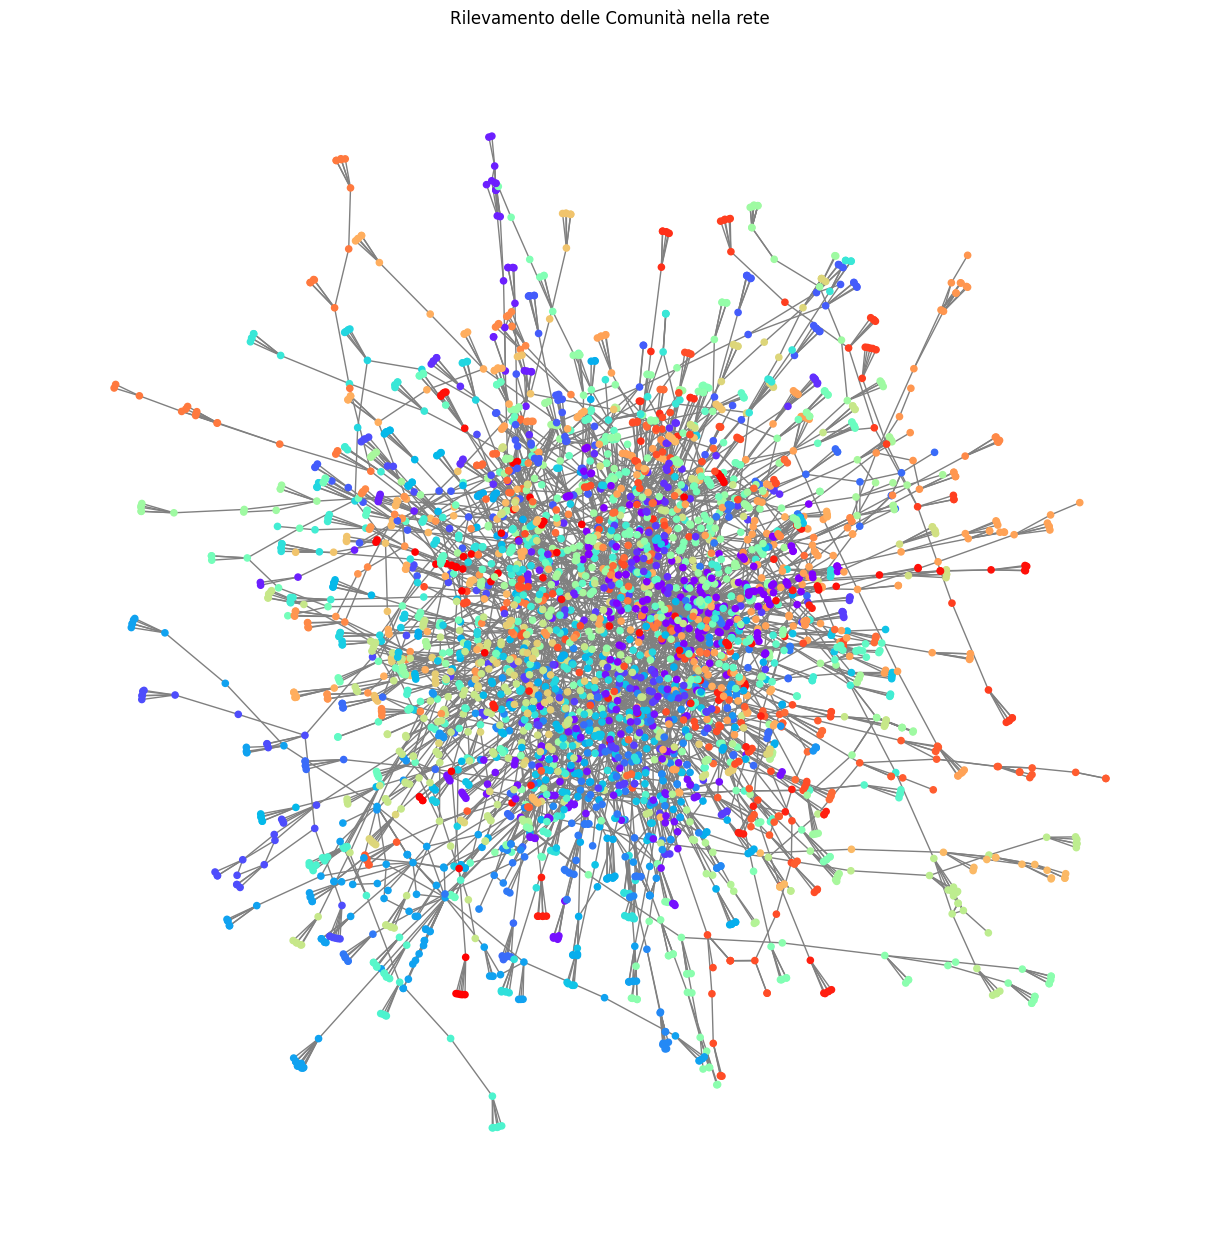

In [42]:
# Rilevamento delle comunità con l'algoritmo Louvain
partition = community_louvain.best_partition(G)

# Aggiungi il colore della comunità come attributo ai nodi
community_colors = [partition[node] for node in G.nodes()]

# Disegna il grafo con i colori delle comunità
plt.figure(figsize=(12, 12))
nx.draw(G, node_size=20, edge_color='gray', with_labels=False, node_color=community_colors, cmap=plt.cm.rainbow)
plt.title("Rilevamento delle Comunità nella rete")
plt.show()


## Nuovo codice

In [49]:
# Conta il numero totale di triadi
import networkx as nx
import itertools

def count_triad_types(G):
    triad_types = {
        'closed': 0,   # Tutte e tre le connessioni esistono
        'open': 0      # Almeno una connessione mancante
    }
    
    for node in G.nodes():
        # Prendi tutti i vicini del nodo
        neighbors = list(G.neighbors(node))
        
        # Controlla tutte le possibili combinazioni di 2 vicini
        for n1, n2 in itertools.combinations(neighbors, 2):
            if G.has_edge(n1, n2):
                triad_types['closed'] += 1
            else:
                triad_types['open'] += 1
    
    return triad_types

triad_analysis = count_triad_types(G)
print("Analisi delle Triadi:")
print(f"Triadi chiuse: {triad_analysis['closed']}")
print(f"Triadi aperte: {triad_analysis['open']}")

Analisi delle Triadi:
Triadi chiuse: 0
Triadi aperte: 17594


In [73]:
import networkx as nx
import matplotlib.pyplot as plt

# Trova tutte le clique massimali nel grafo
max_cliques = list(nx.find_cliques(G))
print("\nAnalisi delle Clique:")
print(f"Numero totale di clique: {len(max_cliques)}")
print(f"Dimensione della clique più grande: {len(max_cliques[0])}")
print("Primi 5 membri della clique più grande:", max_cliques[0][:5])



Analisi delle Clique:
Numero totale di clique: 4912
Dimensione della clique più grande: 2
Primi 5 membri della clique più grande: ['Dennis Underwood', 'The Mouseketeers at Walt Disney World']


Main K-Core Details:
Number of nodes: 26
K-value: 10


C:\Users\mauro\AppData\Local\Temp\ipykernel_7580\1249038173.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


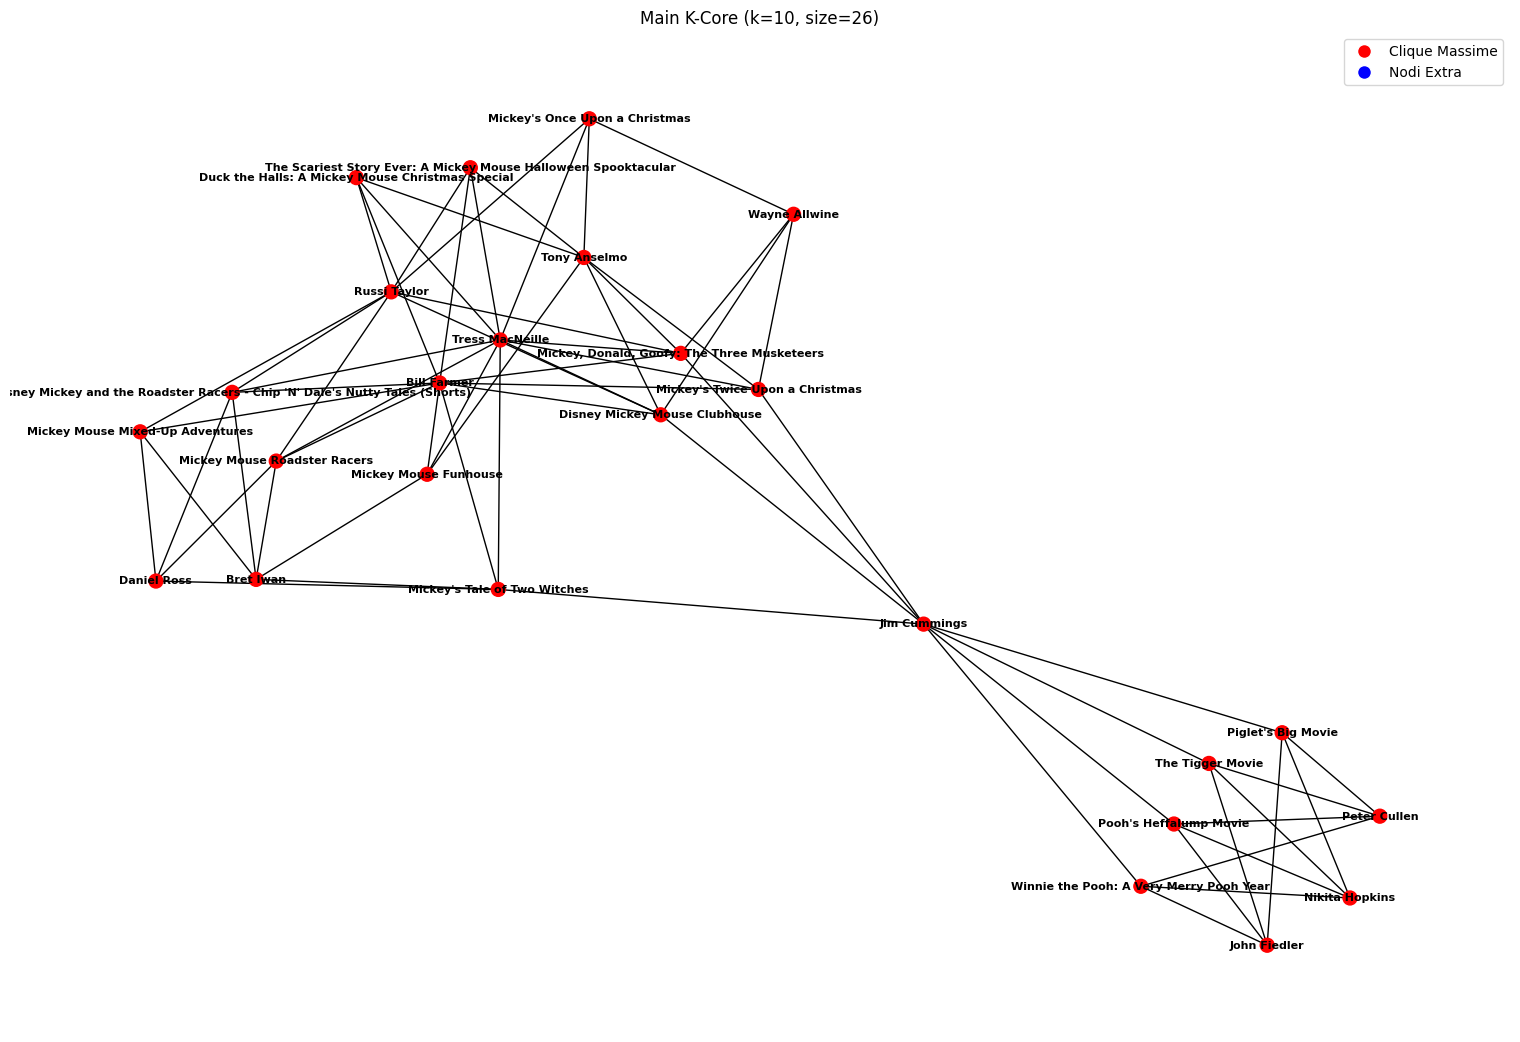

In [69]:
import matplotlib.pyplot as plt
import networkx as nx

# Decomposizione in k-core
k_cores = nx.k_core(G)

# Trova la componente connessa più grande del k-core principale
largest_k_core_cc = max(nx.connected_components(k_cores), key=len)
main_core = k_cores.subgraph(largest_k_core_cc).copy()

# Funzione per visualizzare il k-core principale con colori e legenda
def plot_main_k_core_with_legend(G):
    # Creare una copia del main-core
    main_core = G.copy()
    
    # Calcolare i parametri del main-core
    main_core_size = len(main_core.nodes())
    k_value = max(dict(main_core.degree()).values())
    
    # Posizionamento dei nodi utilizzando layout spring
    pos = nx.spring_layout(main_core, seed=42)
    
    # Assegnare colori ai nodi in base alle clique massime
    max_cliques = list(nx.find_cliques(main_core))
    node_colors = {}
    clique_color = 'red'  # Colore per i nodi delle clique massime
    extra_color = 'blue'  # Colore per i nodi extra
    
    for clique in max_cliques:
        for node in clique:
            node_colors[node] = clique_color
    
    for node in main_core.nodes():
        if node not in node_colors:
            node_colors[node] = extra_color
    
    # Disegnare il grafo
    plt.figure(figsize=(15, 10))
    nx.draw(main_core, pos, 
            node_color=[node_colors[node] for node in main_core.nodes()], 
            node_size=100, 
            with_labels=True, 
            font_size=8, 
            font_weight='bold')
    
    # Aggiungere legenda
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor=clique_color, markersize=10, label='Clique Massime'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor=extra_color, markersize=10, label='Nodi Extra')
    ]
    plt.legend(handles=legend_elements)
    
    # Titolo del grafico
    plt.title(f'Main K-Core (k={k_value}, size={main_core_size})')
    
    # Stampa informazioni dettagliate
    print(f"Main K-Core Details:")
    print(f"Number of nodes: {main_core_size}")
    print(f"K-value: {k_value}")
    
    plt.tight_layout()
    plt.show()

# Esegui la visualizzazione del k-core principale con colori e legenda
plot_main_k_core_with_legend(main_core)



Ego Network Analysis:
Nodo: Jim Cummings
Numero di vicini: 33
Densità della rete: 0.0588



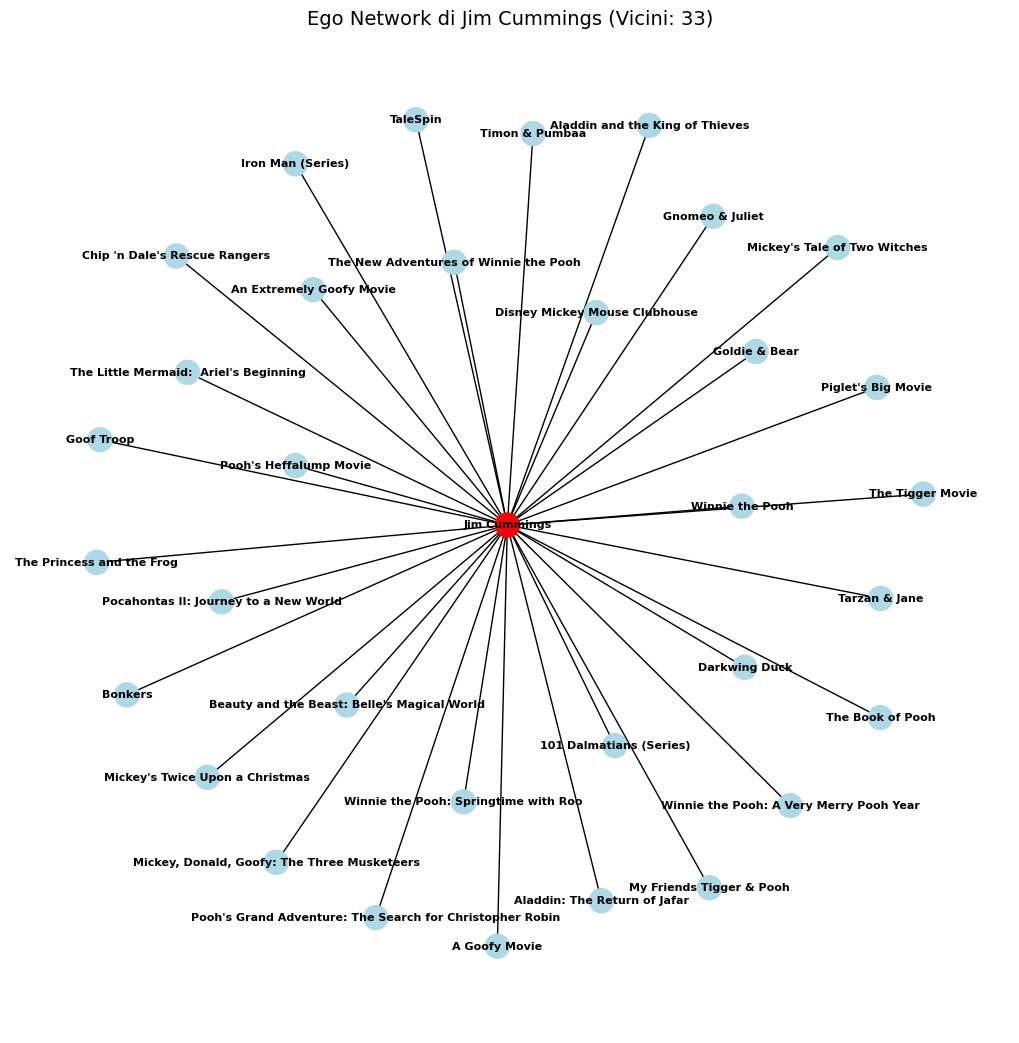

In [72]:
import matplotlib.pyplot as plt
import networkx as nx

def analyze_ego_network(G, node):
    # Crea l'ego network per un nodo specifico
    ego_network = nx.ego_graph(G, node)
    
    return {
        'node': node,
        'num_neighbors': len(list(ego_network.neighbors(node))),
        'network_density': nx.density(ego_network)
    }

# Identifica il nodo con la centralità di grado più alta
degree_centrality = nx.degree_centrality(G)
specific_node = max(degree_centrality, key=degree_centrality.get)

# Esegui l'analisi della ego network per il nodo più centrale
ego_network_analysis = analyze_ego_network(G, specific_node)
print("\nEgo Network Analysis:")
print(f"Nodo: {ego_network_analysis['node']}")
print(f"Numero di vicini: {ego_network_analysis['num_neighbors']}")
print(f"Densità della rete: {ego_network_analysis['network_density']:.4f}\n")

# Visualizzazione della Ego Network del nodo più centrale
def plot_ego_network(G, node):
    # Crea l'ego network
    ego_network = nx.ego_graph(G, node)
    
    # Layout
    pos = nx.spring_layout(ego_network)
    
    # Colora il nodo centrale in rosso e i vicini in azzurro chiaro
    node_colors = ['red' if n == node else 'lightblue' for n in ego_network.nodes()]
    
    # Disegna l'ego network
    plt.figure(figsize=(10, 10))
    nx.draw(ego_network, pos, 
            with_labels=True, 
            node_color=node_colors, 
            node_size=300, 
            font_size=8, 
            font_weight='bold')
    
    plt.title(f'Ego Network di {node} (Vicini: {len(list(ego_network.neighbors(node)))})', fontsize=14)
    plt.show()

# Visualizza la ego network per il nodo più centrale
plot_ego_network(G, specific_node)


In [53]:
# Calcolo della Group Degree Centrality
def group_degree_centrality(G, group):
    # Calcola la centralità di gruppo basata sul grado
    return sum(degree_centrality[node] for node in group) / len(group)

def group_betweenness_centrality(G, group):
    # Calcola la centralità di gruppo basata sul betweenness
    return sum(betweenness_centrality[node] for node in group) / len(group)

# Esempio: prendi le prime 3 comunità come gruppi
communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = []
    communities[community_id].append(node)

group_centrality_results = []
for community_id, group in list(communities.items())[:3]:
    group_centrality = {
        'community_id': community_id,
        'group_degree_centrality': group_degree_centrality(G, group),
        'group_betweenness_centrality': group_betweenness_centrality(G, group),
        'group_size': len(group)
    }
    group_centrality_results.append(group_centrality)

print("\nGroup Centrality Analysis:")
for result in group_centrality_results:
    print(f"Comunità {result['community_id']}:")
    print(f"  Dimensione gruppo: {result['group_size']}")
    print(f"  Centralità di grado di gruppo: {result['group_degree_centrality']:.4f}")
    print(f"  Centralità di betweenness di gruppo: {result['group_betweenness_centrality']:.4f}")


Group Centrality Analysis:
Comunità 0:
  Dimensione gruppo: 170
  Centralità di grado di gruppo: 0.0010
  Centralità di betweenness di gruppo: 0.0062
Comunità 1:
  Dimensione gruppo: 103
  Centralità di grado di gruppo: 0.0009
  Centralità di betweenness di gruppo: 0.0051
Comunità 2:
  Dimensione gruppo: 52
  Centralità di grado di gruppo: 0.0007
  Centralità di betweenness di gruppo: 0.0017
